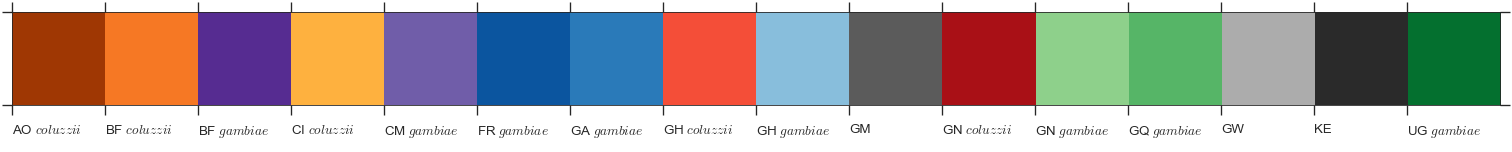

In [1]:
%run data_phase2_ar1.ipynb
# ag1k imports
sys.path.insert(0, '/home/csclarkson/src/python')
from ag1k.util import *
from ag1k import phase2_ar1
from ag1k import phase1_ar3
from ag1k import phase1_ar31

In [44]:
chrom = ('X', '3R', '3L', '2R', '2L')

In [45]:
#get phase 2 samples
samples = phase2_ar1.tbl_samples
samples = samples.cut(0,2,3,'m_s')
#test
l = samples.selecteq('population', 'BFcol')
l

0|ox_code,1|population,2|country,3|m_s
AB0087-C,BFcol,Burkina Faso,M
AB0088-C,BFcol,Burkina Faso,M
AB0089-C,BFcol,Burkina Faso,M
AB0090-C,BFcol,Burkina Faso,M
AB0091-C,BFcol,Burkina Faso,M


In [46]:
#to follow what gio has gone we need to produce this for phase 2
tbl_example = {chrom: (etl.fromtsv('/kwiat/vector/ag1000g/release/phase1.AR3/extras/neaf_markers/1run_%s.tab' % chrom, delimiter='\t')
               .rename('sample', 'ox_code')
               .rename('SS', 'SS_%s' % chrom)
               .convert('SS_%s' % chrom, int)) for chrom in contigs}
tbl_example['3L']

0|ox_code,1|molecular_type,2|MM,3|SS_3L,4|MS,5|missing,6|other,7|3L:67314,8|3L:77072,9|3L:82544,10|3L:122238,11|3L:122297,12|3L:122526,13|3L:122834,14|3L:182770,15|3L:302443,16|3L:304422,17|3L:304874,18|3L:344250,19|3L:344820,20|3L:8594715,21|3L:9663677,22|3L:10278661,23|3L:10882689,24|3L:11269118
AB0085-C,S,0,17,1,0,0,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,MS,SS,SS,SS,SS
AB0087-C,M,18,0,0,0,0,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM
AB0088-C,M,18,0,0,0,0,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM
AB0089-C,M,18,0,0,0,0,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM
AB0090-C,M,17,0,1,0,0,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MM,MS,MM,MM,MM


In [47]:
#lets get a dictionary of the Neafsey positions for each chrom arm then use this to interogate the p2 samples at these positions

In [48]:
tbl_neaf = (etl
    .fromtsv('/kwiat/vector/ag1000g/release/phase1.AR3/extras/neaf_markers/Neafsey_top_MS_allele_freqs.2.txt')
    .pushheader(['ID', 'chrom', 'pos', 'allele1', 'allele2', 'af_gamb', 'af_colu', 'af_bama'])
    .convert('pos', int)
    .convert((5, 6, 7), float)
    .addfield('allele_gamb', lambda row: row.allele1 if row.af_gamb > row.af_colu else row.allele2)
    .addfield('allele_colu', lambda row: row.allele1 if row.af_gamb < row.af_colu else row.allele2)
)
tbl_neaf

0|ID,1|chrom,2|pos,3|allele1,4|allele2,5|af_gamb,6|af_colu,7|af_bama,8|allele_gamb,9|allele_colu
rs180290715,2L,181564,A,G,0.0294117647058823,1.0,0.970588235294118,G,A
rs180290738,2L,210286,T,G,0.972222188888876,0.0,0.972222188888876,T,G
rs180290751,2L,356421,T,C,1.0,0.0,1.0,T,C
rs180290761,2L,441325,A,C,0.0,1.0,1.0,C,A
rs180290764,2L,456831,T,G,1.0,0.0,1.0,T,G


In [65]:
#ndic = {c: list(tbl_neaf.selecteq('chrom', c)['pos']) for c in chrom}

In [68]:
#now let's get the genotypes for all individuals at these positions

In [238]:
# extract Neafsey SNP positions
pos_neaf = tbl_neaf.eq('chrom', chrom).values('pos').array()

# load Ag1000G SNP positions
pos = allel.SortedIndex(phase2_ar1.callset_pass_biallelic[chrom]['variants/POS'])

# locate intersection
loc1, loc2 = pos.locate_intersection(pos_neaf)

# find positions of SNPs in intersection
pos_isec = pos[loc1]

# subselect SNP tables
tbl_neaf_isec = tbl_neaf.selectin('pos', pos_isec)

callset_fn = '/kwiat/vector/ag1000g/release/phase2.AR1/variation/main/hdf5/biallelic/ag1000g.phase2.ar1.pass.biallelic.h5'
callset = h5py.File(callset_fn, mode='r')
gn_isec = allel.GenotypeChunkedArray(callset[chrom]['calldata']['genotype'])
gn_isec = np.asarray(gn_isec.compress(loc1))


In [342]:
#setup gen_dict
gen_dict = {
    0: ref,
    1: alt,
    -1: '?',
    '.': '?'
}

#set up an empty array
#sp_ar = np.zeros((gn_isec.shape[0], gn_isec.shape[1]), dtype='|S3')
sp_ar = np.zeros((4, 1142), dtype='|S3') 

for row in range(0,4):
    #get the neafsey data for this locus
    ne = tbl_neaf.select("{{chrom}} == '{chr}' and {{pos}} == {p}".format(chr=chrom, p=pos_isec[row]))
    ref = ne['allele1'][0]
    alt = ne['allele2'][0]
    sform = ne['allele_gamb'][0]
    mform = ne['allele_colu'][0]
    
    #loop through the samples
    for col in range(0,gn_isec.shape[1]):
        gn1 = gn_isec[row,col][0]
        gn2 = gn_isec[row,col][1]

        #assign species to AIM genotype
        if gen_dict[gn1] == sform: 
            sp1 = 'S'
        elif gen_dict[gn1] == mform:
            sp1 = 'M'
        else:
            sp1 = '?'

        if gen_dict[gn2] == sform: 
            sp2 = 'S'
        elif gen_dict[gn2] == mform: 
            sp2 = 'M'
        else: 
            sp2 = '?'
        
        #add to array
        sp_ar[row, col] = sp1
        

In [343]:
sp_ar

array([[b'?', b'?', b'?', ..., b'?', b'?', b'?'],
       [b'M', b'M', b'M', ..., b'M', b'M', b'M'],
       [b'M', b'M', b'M', ..., b'M', b'M', b'M'],
       [b'?', b'?', b'?', ..., b'?', b'?', b'?']], 
      dtype='|S3')

In [318]:
ne = tbl_neaf.select("{{chrom}} == '{chr}' and {{pos}} == {p}".format(chr=chrom, p=pos_isec[0]))

In [339]:
ne = tbl_neaf.select("{{chrom}} == '{chr}' and {{pos}} == {p}".format(chr=chrom, p=pos_isec[4]))
ne

0|ID,1|chrom,2|pos,3|allele1,4|allele2,5|af_gamb,6|af_colu,7|af_bama,8|allele_gamb,9|allele_colu
rs180547901,3R,455087,A,C,0.025,0.975,0.95,C,A


In [316]:
sp_ar

array([[b'tes', b'tes', b'tes', ..., b'tes', b'tes', b'tes'],
       [b'tes', b'tes', b'tes', ..., b'tes', b'tes', b'tes'],
       [b'tes', b'tes', b'tes', ..., b'tes', b'tes', b'tes'],
       ..., 
       [b'tes', b'tes', b'tes', ..., b'tes', b'tes', b'tes'],
       [b'tes', b'tes', b'tes', ..., b'tes', b'tes', b'tes'],
       [b'tes', b'tes', b'tes', ..., b'tes', b'tes', b'tes']], 
      dtype='|S3')

In [310]:
#set up an empty array
sp_ar = np.zeros((gn_isec.shape[0], gn_isec.shape[1]), dtype='|S3')
sp_ar.shape

(38, 1142)

In [312]:
sp_ar[37,1141]

b''

In [309]:
sp_ar

array([[b'MM', b'MM', b'MM', ..., b'MM', b'MM', b'MM'],
       [b'MM', b'MM', b'MM', ..., b'MM', b'MM', b'MM'],
       [b'??', b'??', b'??', ..., b'??', b'??', b'??'],
       ..., 
       [b'MM', b'MM', b'MM', ..., b'MM', b'MM', b'MM'],
       [b'MM', b'MM', b'MM', ..., b'MM', b'MM', b'MM'],
       [b'??', b'??', b'??', ..., b'??', b'??', b'??']], 
      dtype='|S3')

In [254]:
q = tbl_neaf.select("{{chrom}} == '{chr}' and {{pos}} == {p}".format(chr=chrom, p=pos_isec[row]))
q

0|ID,1|chrom,2|pos,3|allele1,4|allele2,5|af_gamb,6|af_colu,7|af_bama,8|allele_gamb,9|allele_colu
rs5566132,3R,27885,T,G,0.973684189473676,0.0,0.973684189473676,T,G


In [285]:
ref = q['allele1'][0]
alt = q['allele2'][0]
sform = q['allele_gamb'][0]
mform = q['allele_colu'][0]


In [286]:
mform

'G'

In [260]:
gn_isec[1,1]

array([0, 0], dtype=int8)

In [262]:
a = 'M'
b = 'M'
print(a+b)

MM


In [61]:
l = list(samples.selecteq('population', populations[0])['m_s'])
l

['M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M']

In [ ]:
tbl = {c:  for c in chrom}

In [49]:
populations

('AOcol',
 'BFcol',
 'CIcol',
 'GHcol',
 'GNcol',
 'GW',
 'GM',
 'GNgam',
 'GHgam',
 'GQgam',
 'BFgam',
 'CMgam',
 'UGgam',
 'GAgam',
 'FRgam',
 'KE')

In [13]:
tbl = {chrom: (etl.fromtsv('/kwiat/vector/ag1000g/release/phase1.AR3/extras/neaf_markers/1run_%s.tab' % chrom, delimiter='\t')
               .rename('sample', 'ox_code')
               .rename('SS', 'SS_%s' % chrom)
               .convert('SS_%s' % chrom, int)) for chrom in contigs}

In [23]:
len(tbl['2L'])

766

In [21]:
a = (tbl['X'].join(tbl['2R'], key='ox_code'))
a

0|ox_code,1|molecular_type,2|MM,3|SS_X,4|MS,5|missing,6|other,7|X:4144,8|X:43831,9|X:15100037,10|X:15102030,11|X:15122298,12|X:15152322,13|X:15265556,14|X:15469805,15|X:15654817,16|X:15904818,17|X:15931132,18|X:15933212,19|X:15935327,20|X:15937755,21|X:17201100,22|X:17203086,23|X:17211289,24|X:17371331,25|X:17413658,26|X:17655806,27|X:17673204,28|X:17691764,29|X:17707969,30|X:17750600,31|X:17758240,32|X:17767738,33|X:17802089,34|X:17804078,35|X:17818460,36|X:17819878,37|X:17822430,38|X:17829586,39|X:17839055,40|X:17854770,41|X:17855890,42|X:17863952,43|X:17877673,44|X:17883470,45|X:17892553,46|X:17906226,47|X:17907713,48|X:17919967,49|X:17921848,50|X:17922361,51|X:17922652,52|X:17930970,53|X:17936437,54|X:17950636,55|X:17974469,56|X:17974772,57|X:18013323,58|X:18015016,59|X:18031772,60|X:18043476,61|X:18046469,62|X:18055878,63|X:18064888,64|X:18069465,65|X:18081652,66|X:18093475,67|X:18098910,68|X:18102566,69|X:18144827,70|X:18145980,71|X:18146820,72|X:18151779,73|X:18193109,74|X:18213254,75|X:18231178,76|X:18243004,77|X:18244075,78|X:18244214,79|X:18255024,80|X:18259640,81|X:18259666,82|X:18260913,83|X:18296187,84|X:18320057,85|X:18351413,86|X:18358985,87|X:18359371,88|X:18372750,89|X:18372852,90|X:18372890,91|X:18376928,92|X:18405644,93|X:18415090,94|X:18416362,95|X:18418071,96|X:18419070,97|X:18439071,98|X:18451087,99|X:18451490,100|X:18474471,101|X:18483223,102|X:18483308,103|X:18488749,104|X:18494213,105|X:18503755,106|X:18506770,107|X:18514224,108|X:18534685,109|X:18535307,110|X:18541695,111|X:18545950,112|X:18553766,113|X:18561007,114|X:18597532,115|X:18616815,116|X:18633609,117|X:18664320,118|X:18666391,119|X:18666995,120|X:18667110,121|X:18673482,122|X:18681536,123|X:18709711,124|X:18715423,125|X:18721037,126|X:18733692,127|X:18736537,128|X:18738010,129|X:18738227,130|X:18739073,131|X:18751643,132|X:18752247,133|X:18756071,134|X:18756937,135|X:18758300,136|X:18768526,137|X:18769165,138|X:18772627,139|X:18777403,140|X:18778473,141|X:18779655,142|X:18782469,143|X:18803767,144|X:18841196,145|X:18850598,146|X:18850788,147|X:18855100,148|X:18875872,149|X:18876416,150|X:18883085,151|X:18883338,152|X:18888979,153|X:18891859,154|X:18985260,155|X:19005798,156|X:19117756,157|X:19154757,158|X:19174276,159|X:19174735,160|X:19208510,161|X:19227341,162|X:19263223,163|X:19263806,164|X:19275911,165|X:19300779,166|X:19301398,167|X:19305628,168|X:19440618,169|X:19519687,170|X:19529503,171|X:19529806,172|X:19554201,173|X:19555085,174|X:19569364,175|X:19569839,176|X:19605776,177|X:19609315,178|X:19612071,179|X:19619051,180|X:19627490,181|X:19630571,182|X:19631429,183|X:19631625,184|X:19632267,185|X:19633607,186|X:19641255,187|X:19643251,188|X:19648745,189|X:19649825,190|X:19650465,191|X:19653831,192|X:19655218,193|X:19658441,194|X:19659462,195|X:19661079,196|X:19668644,197|X:19671378,198|X:19704860,199|X:19705887,200|X:19710357,201|X:19712176,202|X:19712866,203|X:19716539,204|X:19725156,205|X:19731241,206|X:19732984,207|X:19735812,208|X:19737928,209|X:19770048,210|X:19771211,211|X:19771979,212|X:19773913,213|X:19776018,214|X:19808574,215|X:19818055,216|X:19825227,217|X:19835133,218|X:19836117,219|X:19837576,220|X:19848422,221|X:19849243,222|X:19850268,223|X:19853409,224|X:19853649,225|X:19854380,226|X:19855512,227|X:19857473,228|X:19865560,229|X:19865723,230|X:19869654,231|X:19878888,232|X:19889029,233|X:19907496,234|X:19907655,235|X:19926288,236|X:19926762,237|X:19936493,238|X:19963776,239|X:19970630,240|X:19971453,241|X:19972120,242|X:19984239,243|X:19989651,244|X:19991095,245|X:19996358,246|X:20007133,247|X:20009203,248|X:20010584,249|X:20011785,250|X:20011891,251|X:20014696,252|X:20015293,253|X:20015634,254|X:20016494,255|X:20063553,256|X:20117226,257|X:20128328,258|X:20128465,259|X:20128719,260|X:20129288,261|X:20136659,262|X:20138331,263|X:20143470,264|X:20147987,265|X:20151732,266|X:20154269,267|X:20155233,268|X:20360797,269|X:20364269,270|X:20408988,271|X:20636715,272|X:20640231,273|X:20708775,274|X:20749100,275|X:20759443,276|X:

In [12]:
tbl_genome = (tbl['X'].join(tbl['2R'], key='sample')
              .join(tbl['2L'], key='sample')
              .join(tbl['3R'], key='sample')
              .join(tbl['3L'], key='sample')
              .join(samples, key='sample')
              )

tbl_genome

FieldSelectionError: selection is not a field or valid field index: 'sample'

FieldSelectionError: selection is not a field or valid field index: 'sample'